# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
# import numpy, matplotlib and 3d plots.
import numpy as np
from matplotlib import pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
from scipy import optimize
import pandas as pd

# Import the model class.
import inauguralproject

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Question 1

In this question i will solve the model with different specifications for the household production function in the form of different alpha and sigma values. Alpha dictates the relative productivity between the male and female member. Sigma dictates the elasticity of the substitution between the male and female household work. 

I solve the model by looping over the proposed alpha and sigma values and finding (by using the built in model solver), the optimal allocation of work.

In [2]:
# I define the different alpha and sigma values i want to solve the model at.
a_variations = [0.25, 0.5, 0.75]
s_variations = [0.5, 1, 1.5]

# Empty array for storing resutls and the correspondin alpha and sigma values
panel_data      = np.zeros((9,3))

# i is a count variable and will inform the loop where to place the results within the array.
i = 0

# i loop over all alpha and sigma values
for a in a_variations:
    for s in s_variations:
        # The model is redefined with the parameter values
        model = inauguralproject.HouseholdSpecializationModelClass(a,s)

        # and solved
        optimum = model.solve_discrete()

        # the results are stored in the array.
        panel_data[i,0] = a
        panel_data[i,1] = s
        panel_data[i,2] = optimum.HF/optimum.HM
        i+=1

# to ease the plotting of the results the array is made into a pandas dataframe.
table = pd.DataFrame(panel_data, columns=["alpha","sigma","HF/HM"])
print(table)

c:\Users\Bruger\Desktop\INP\projects-2023-mit-hemmelige-hold\inauguralproject\inauguralproject.py:65: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


   alpha  sigma     HF/HM
0   0.25    0.5  0.545455
1   0.25    1.0  0.307692
2   0.25    1.5  0.214286
3   0.50    0.5  1.000000
4   0.50    1.0  1.000000
5   0.50    1.5  1.000000
6   0.75    0.5  1.833333
7   0.75    1.0  3.250000
8   0.75    1.5  4.666667


In the following code i plot the result of the optimization at the different alpha and sigma values.

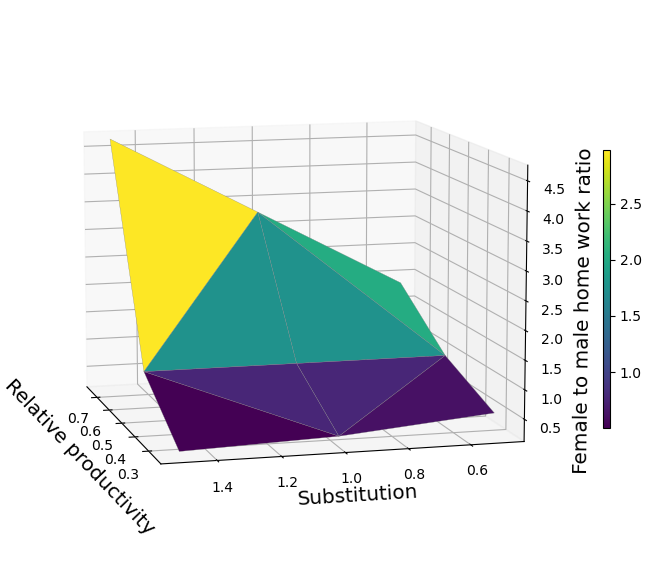

In [3]:
# The results illustrated in a figure, using the three cordinate lists
fig=plt.figure(figsize =(9, 9))
ax=fig.add_subplot(111, projection='3d')

#surface plot
my_cmap = plt.get_cmap()
trisurf = ax.plot_trisurf(table['alpha'], table['sigma'], table['HF/HM'], cmap=my_cmap, linewidth=0.2, antialiased=True, edgecolor = 'grey')
fig.colorbar(trisurf, ax = ax, shrink = 0.4, aspect = 40)
ax.set_xlabel('Relative productivity', size='x-large')
ax.set_ylabel('Substitution', size='x-large')
ax.set_zlabel('Female to male home work ratio', size='x-large')
ax.view_init(elev=10, azim=165)
plt.show(block=False)

# Question 2

I solve the mode by looping over the proposed female wages and solving for the optimal allocation of work hours.

In [4]:
# I define the different female wages i want to solve the model at.
wf_variations = [0.8,0.9,1.0,1.1,1.2]

# I create an empty array to be filled with value of the log of the female to male wage ratio and the corresponding log of female to male home work.
cordinates = np.zeros(shape=(5,2))
# a list for each of the variables i want to plot.
l_wf_wm_cor = []
l_hf_hm_cor = []

# For every wage i solve the model using the built in model class functions.
for j,wf in enumerate(wf_variations):
        # The model is defined
        model = inauguralproject.HouseholdSpecializationModelClass(wF=wf)

        # ... and solved
        optimum = model.solve_discrete()

        # The values are saved
        cordinates[j]   = [np.log(wf), np.log(optimum.HF/optimum.HM)]
        l_wf_wm_cor.append(np.log(wf))
        l_hf_hm_cor.append(np.log(optimum.HF/optimum.HM))




And plot the result

at Log(wf/wm) :-0.2, the log(Hf/Hm) is: 0.2
at Log(wf/wm) :-0.1, the log(Hf/Hm) is: 0.0
at Log(wf/wm) :0.0, the log(Hf/Hm) is: 0.0
at Log(wf/wm) :0.1, the log(Hf/Hm) is: -0.1
at Log(wf/wm) :0.2, the log(Hf/Hm) is: -0.2


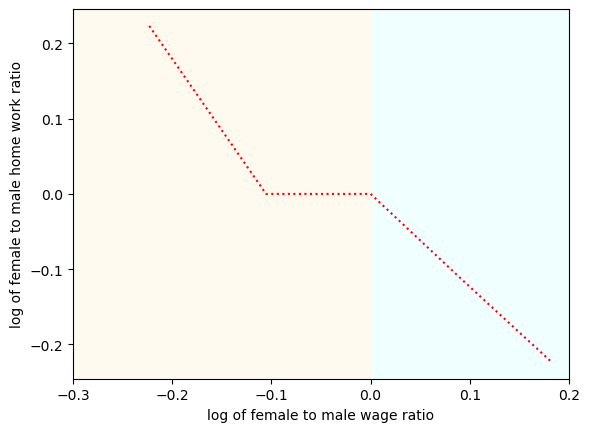

In [5]:
# The results in words, using the cordinates array.
for i in range(0, 5):
        print(f'at Log(wf/wm) :{cordinates[i,0]:<.1f}, the log(Hf/Hm) is: {cordinates[i,1]:<.1f}')

# the values in a plot
plt.plot(l_wf_wm_cor, l_hf_hm_cor, linestyle = 'dotted', color='r')
plt.xlim([-0.3,0.2])
plt.axvspan(-0.3,0, facecolor='floralwhite')
plt.axvspan(0,0.2, facecolor='azure')
plt.xlabel("log of female to male wage ratio")
plt.ylabel("log of female to male home work ratio")
plt.show()

# Question 3

I solve the model by looping over the proposed female wages and using the builtin functions find the optimal allocation of work hours.

In [6]:
# I define a model
model_three = inauguralproject.HouseholdSpecializationModelClass()

# Solve the model
model_three.solve_wF_vec()
l_wf_wm_cor_2 = np.log(model_three.par.wF_vec)
l_hf_hm_cor_2 = np.log(model_three.sol.HF_vec/model_three.sol.HM_vec)


And plot the result.

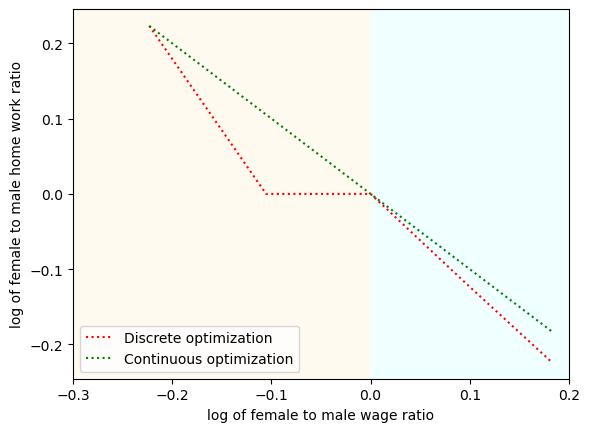

In [7]:
# the values in a plot
plt.plot(l_wf_wm_cor, l_hf_hm_cor, linestyle = 'dotted', color='r', label="Discrete optimization")
plt.plot(l_wf_wm_cor_2, l_hf_hm_cor_2, linestyle = 'dotted', color='g', label="Continuous optimization")
plt.legend()
plt.xlim([-0.3,0.2])
plt.axvspan(-0.3,0, facecolor='floralwhite')
plt.axvspan(0,0.2, facecolor='azure')
plt.xlabel("log of female to male wage ratio")
plt.ylabel("log of female to male home work ratio")
plt.show()


# Question 4


I solve the model using my own model class functions.

In [8]:
# Import the model class.
import inauguralproject

# I define a model for the model class
model   = inauguralproject.HouseholdSpecializationModelClass()

# I solve the model using the estimate function
# The model function "estimate" returns an alpha and a sigma value that best approximate the proposed relationship between the log female to male home work ratio and the log female to male wage.
res     = model.estimate()

# Which produce the alpha and sigma values that best solves the model as to arrive at the predetermined beta values from Siminski and Yetsenga (2022).
print(f'I find the value of alpha to be: {res.x[0]:<.1f}')
print(f'I find the value of sigma to be: {res.x[1]:<.1f}')


c:\Users\Bruger\Desktop\INP\projects-2023-mit-hemmelige-hold\inauguralproject\inauguralproject.py:183: RuntimeWarning: divide by zero encountered in divide
  y = np.log(sol.HF_vec/sol.HM_vec)
c:\Users\Bruger\Desktop\INP\projects-2023-mit-hemmelige-hold\inauguralproject\inauguralproject.py:65: RuntimeWarning: invalid value encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
c:\Users\Bruger\Desktop\INP\projects-2023-mit-hemmelige-hold\inauguralproject\inauguralproject.py:65: RuntimeWarning: divide by zero encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


I find the value of alpha to be: 1.0
I find the value of sigma to be: 0.1


I plot the models solution and my OLS approximation.

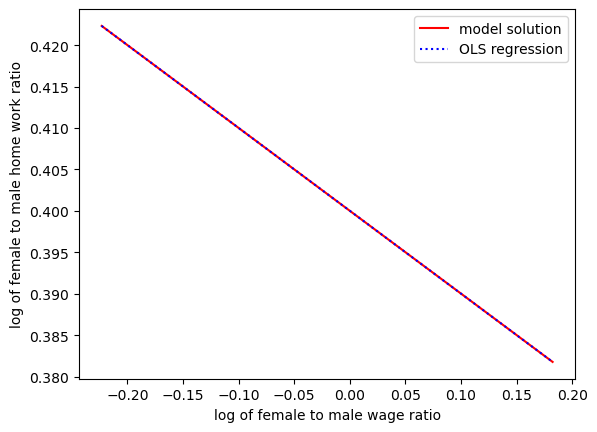

In [9]:
# I solve the model using the alpha and sigma values that gave the result closest to the Siminski and Yetsenga 2022 relationship.
model_estimated   = inauguralproject.HouseholdSpecializationModelClass(alpha=res.x[0], sigma = res.x[1])

# The model solution
# I find the optimale female to male homework ratios at the solution alpha and sigma values.
solve       = model_estimated.solve_wF_vec()
# For the plot i need the log of the Female to male homework ratio at the log female to male wage.
hf_hm = np.log(solve.HF_vec/solve.HM_vec)
wf = np.log(model_estimated.par.wF_vec)

# The predicted values given the OLS regression
# I find the actual beta values at the solution sigma and alpha values.
betas       = model_estimated.run_regression(a=res.x[0], s=res.x[1])
# I predict the female to male home work ratio according to the optimal beta values.
y_vals = betas[0] + betas[1]*wf


# Now the model solution and the OLS solution can be plotted together.
plt.plot(wf, hf_hm, linestyle = 'solid', color='r', label="model solution")
plt.plot(wf, y_vals, linestyle = 'dotted', color='b', label="OLS regression")
plt.legend()
#plt.xlim([-0.24,0.2])
plt.xlabel("log of female to male wage ratio")
plt.ylabel("log of female to male home work ratio")
plt.show()


# Question 5


I found that the alpha value tha best fit the relationship found in Siminski and Yetsenga (2022) was 1. 
As such the current model overestimates the relative productivity of women compared to men when producing the home good. This is a result of the model finding to large female to male home work ratios, which the simple model can only explain as a difference in men and womens home productivity. 

By introducing another reason for the descrepency between men and womens work allocation that increases womens relative to mens home work allocation, we can create a model that fits the Yetsenga result and still has an alpha value of 0.5. 

I propose a change in the way the utility is calculated for men and women, i implement the following changes to the model: 
<br>
1) I introduce heterogenity in the total consumption by assigning a different $\omega$ value for men $\omega_M$ and women $\omega_F$, such taht women prefer the home good and men prefer the market good: $\omega_F < \omega_M$
<br>
2) I also make the disutility selfish, by only including the individuals own work as a disutility, male disutility is then expressed as: $\frac{T_M^{1+\frac{1}{\epsilon}}}{1+\frac{1}{\epsilon}}$
<br>
I introduce these changes to the models utility function in the class, NewModelClass. I also remove the optimization relating to the alpha values as we will take that alpha value as given in the regression parrt of the class.

Below I define a new model and run the regression to find the optimal sigma values:

In [20]:
# Import the model class.
import inauguralproject

# i define a new model using my own new model class, which includes a restriction on female labor hours
new_model = inauguralproject.NewModelClass()

# I solve the model using the estimate function
res_new     = new_model.estimate()

# Which produce the alpha and sigma values that best solves the model as to arrive at the predetermined beta values from Siminski and Yetsenga (2022).
print(f'I find the optimal value of sigma to be: {res_new.x[0]:<.1f}')
print(f'Given that the alpha is  {new_model.par.alpha:<.1f}')

c:\Users\Bruger\Desktop\INP\projects-2023-mit-hemmelige-hold\inauguralproject\inauguralproject.py:384: RuntimeWarning: divide by zero encountered in log
  
c:\Users\Bruger\Desktop\INP\projects-2023-mit-hemmelige-hold\inauguralproject\inauguralproject.py:255: RuntimeWarning: overflow encountered in power
  Q = C**par.omega*H**(1-par.omega)
c:\Users\Bruger\Desktop\INP\projects-2023-mit-hemmelige-hold\inauguralproject\inauguralproject.py:259: RuntimeWarning: invalid value encountered in multiply
  epsilon_ = 1+1/par.epsilon
c:\Users\Bruger\Desktop\INP\projects-2023-mit-hemmelige-hold\inauguralproject\inauguralproject.py:260: RuntimeWarning: invalid value encountered in multiply
  TM = LM+HM


I find the optimal value of sigma to be: 0.1
Given that the alpha is  0.5


Now i plot the regression and the models relation between the wage ratio and female and male home work:

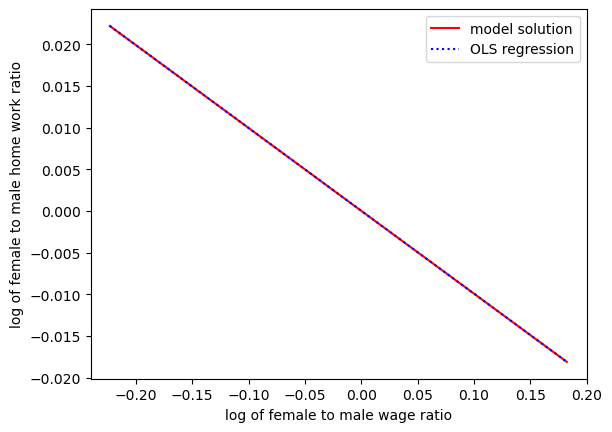

In [25]:
# I plot using the estimated alpha and sigma together with the beta0 and beta1

# I calculated the log of female to male home work ratio for given female wages, at the solution alpha and sigma values
solve       = new_model.solve_wF_vec()

# the log of the female over male wage ratio:
wf_wm = np.log(new_model.par.wF_vec)

# the Home female over home male work. 
hf_hm = np.log(solve.HF_vec/solve.HM_vec)

# I find the optimal beta values at the solution sigma value.
betas       = new_model.run_regression(s=res_new.x[0])

# I predict the female to male home work ratio according to the optimal beta values.
y_vals = betas[0] + betas[1]*wf_wm


# Now the model solution and the OLS solution can be plotted together.
plt.plot(wf_wm, hf_hm, linestyle = 'solid', color='r', label="model solution")
plt.plot(wf_wm, y_vals, linestyle = 'dotted', color='b', label="OLS regression")
plt.legend()
plt.xlim([-0.24,0.2])
plt.xlabel("log of female to male wage ratio")
plt.ylabel("log of female to male home work ratio")
plt.show()


The new model perfectly predicts the relationship found in the Siminski and Yetsenga (2022) paper. I conclude the model extension was succesfull in explaining the difference in home work allocation between men and women without the need for a difference in home work productivity. 